<a href="https://colab.research.google.com/github/benmcnertney/DESC624/blob/main/Answers_Review_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Add a record index field to the data set.
* Determine whether any outliers exist for the education field.
* Do the following for the age field:
  * Standardize the variable.
  * Identify how many outliers there are and identify the most extreme outlier.
* Derive a flag for capital‐gain, called capital‐gain‐flag, which equals 0 for capital gain equals zero, and 1 otherwise.
* Age anomaly? Select only records with age at least 80. Construct a histogram of age. Explain what you see in one sentence and why it is like that in another sentence.

In [ ]:
https://raw.githubusercontent.com/ArashVafa/DESC624/master/adult_ch3_training



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ArashVafa/DESC624/master/adult_ch3_training')
df

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [ ]:
df["index"] = range(df.shape[0])

In [ ]:
df

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4
...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,14792
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,14793
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,14794
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,14795


In [ ]:
from scipy import stats
df['education_z'] = stats.zscore(df['education'])
df

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043
...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,14792,-0.026479
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,14793,-1.566001
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,14794,1.513043
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,14795,-0.411359


In [ ]:
df_outliers = df.query('education_z > 3' or 'education_z < -3')
df_outliers

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z


In [ ]:
df['age_z'] = stats.zscore(df['age'])
df

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163,0.827038
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359,-0.050257
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881,0.753930
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359,0.973254
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043,-0.562012
...,...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,14792,-0.026479,0.315282
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,14793,-1.566001,-0.488904
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,14794,1.513043,-0.488904
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,14795,-0.411359,1.411901


In [ ]:
df_outliers = df.query('age_z > 3' or 'age_z < -3')
df_outliers

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,99,-0.411359,3.751354
204,80,?,9,Widowed,?,Male,0,0,<=50K,204,-0.411359,3.020275
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,492,-0.411359,3.751354
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,552,1.897924,3.605138
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,885,1.128163,3.751354
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,1066,-0.026479,3.751354
1485,82,?,4,Widowed,?,Male,0,0,<=50K,1485,-2.335762,3.166491
2420,90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,2420,-1.950881,3.751354
2430,80,Private,14,Widowed,Prof-specialty,Female,0,0,<=50K,2430,1.513043,3.020275
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K,2467,1.513043,3.751354


In [ ]:
df["flag"] = df["capital-gain"]
df.loc[(df.flag == 0), 'flag'] = 0
df.loc[(df.flag != 0), 'flag'] = 1
df

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z,flag
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0,1.128163,0.827038,0
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K,1,-0.411359,-0.050257,0
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K,2,-1.950881,0.753930,0
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K,3,-0.411359,0.973254,0
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K,4,1.513043,-0.562012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K,14792,-0.026479,0.315282,0
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K,14793,-1.566001,-0.488904,0
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K,14794,1.513043,-0.488904,0
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K,14795,-0.411359,1.411901,0


In [ ]:
df[df["age"] > 80]

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income,index,education_z,age_z,flag
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,99,-0.411359,3.751354,0
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,492,-0.411359,3.751354,0
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,552,1.897924,3.605138,0
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,885,1.128163,3.751354,0
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,1066,-0.026479,3.751354,0
1485,82,?,4,Widowed,?,Male,0,0,<=50K,1485,-2.335762,3.166491,0
2420,90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,2420,-1.950881,3.751354,0
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K,2467,1.513043,3.751354,1
2877,90,Self-emp-not-inc,13,Married-civ-spouse,Prof-specialty,Male,10566,0,<=50K,2877,1.128163,3.751354,1
3453,83,Private,9,Widowed,Protective-serv,Male,0,0,<=50K,3453,-0.411359,3.239598,0


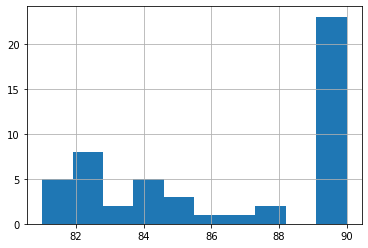

In [ ]:
df[df["age"] > 80]['age'].hist()